In [1]:
from lefschetz_family import EllipticSurface

In [2]:
def plot_points(l, **kwds):
    return list_plot([[c.real(), c.imag()] for c in l],**kwds)
def plot_path(l, **kwds):
    return list_plot([[c.real(), c.imag()] for c in l], True, **kwds)

In [3]:
R.<X,Y,Z> = QQ[]
S.<t> = R[]
U.<u> = S[]

We copy the defining equation from $\S9$ of https://arxiv.org/pdf/2003.00077.pdf

In [4]:
A = (u^8 - 18*u^6 + 163*u^4 - 1152*u^2 + 4096)*t^4 + (3*u^7 - 35*u^5 - 120*u^3 + 1536*u)*t^3+ (u^8 - 13*u^6 + 32*u^4 - 152*u^2 + 1536)*t^2 + (u^7 + 3*u^5 - 156*u^3 + 672*u)*t+ (3*u^6 - 33*u^4 + 112*u^2 - 80)

In [5]:
B1 = (u^2 + u - 8)*t + (-u + 2)
B3 = (u^2 - u - 8)*t + (u^2 + u - 10)
B5 = (u^2 - 7*u + 8)*t + (-u^2 + u + 2)
B7 = (u^2 + 5*u + 8)*t + (u^2 + 3*u + 2)

In [6]:
B2 = -B1(t=-t,u=-u)
B4 = -B3(t=-t,u=-u)
B6 = -B5(t=-t,u=-u)
B8 = -B7(t=-t,u=-u)

In [7]:
P = -Y^2*Z + X^3 + 2*A*X^2*Z + product([B1, B2, B3, B4, B5, B6, B7, B8])*X*Z^2

#### We can then use the methods of the paper:

In [8]:
surface = EllipticSurface(P(5), nbits=1000)

In [9]:
surface = load("example_surface_elliptic_paper")

These are the critical values of $S$.

In [10]:
surface.critical_values

[0.6606400635438652? - 0.7444285169736047?*I,
 -1.354609929078015? - 1.319438693106259?*I,
 0.1329243353783231? - 0.1829094460122528?*I,
 -0.5111237926555627? - 0.08526218089496753?*I,
 3/2,
 7/12,
 5/11,
 3/22,
 0.1329243353783231? + 0.1829094460122528?*I,
 -7/17,
 -0.5111237926555627? + 0.08526218089496753?*I,
 0.6606400635438652? + 0.7444285169736047?*I,
 -21/29,
 -5/3,
 -1.354609929078015? + 1.319438693106259?*I,
 -9]

In [11]:
len(surface.critical_values)

16

We compute a basis of $\pi_1(\mathbb C\setminus\Sigma, b)$ and compute the monodromy matrices along these paths:

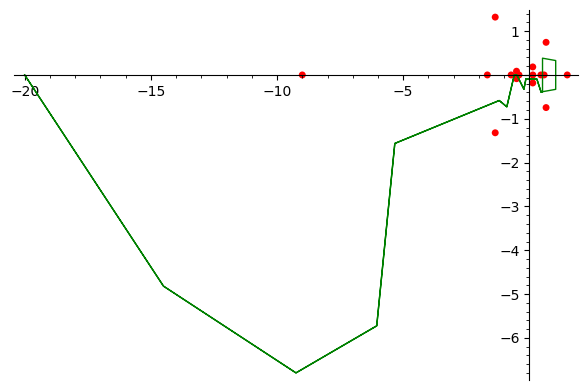

In [12]:
plot_path(surface.paths[5], color="green") + plot_points(surface.critical_values, color="red", size=25)

In [13]:
show(surface.monodromy_matrices)

[
[ 7  9]  [1 1]  [1 1]  [ 3  1]  [ 3  2]  [ 3  2]  [ 3  2]  [ 3  2]
[-4 -5], [0 1], [0 1], [-4 -1], [-2 -1], [-2 -1], [-2 -1], [-2 -1],

[ 3  1]  [ 3  2]  [ 3  1]  [ 3  1]  [ 3  2]  [ 3  2]  [1 1]  [ 3  2]
[-4 -1], [-2 -1], [-4 -1], [-4 -1], [-2 -1], [-2 -1], [0 1], [-2 -1]
]

We can check that they compose to $0$:

In [14]:
product(list(reversed(surface.monodromy_matrices))) == 1

True

From the monodromy matrice swe can deduce the types of the singular fibres.

In [15]:
show([t+str(n) for t, _, n in surface.types])

['I1',
 'I1',
 'I1',
 'I1',
 'I2',
 'I2',
 'I2',
 'I2',
 'I1',
 'I2',
 'I1',
 'I1',
 'I2',
 'I2',
 'I1',
 'I2']

Furthermore we can deduce the monodromy matrices of a morsification of $S$. Here they are grouped to show which monodromy matrix of $S$ they correspond to:

In [16]:
show(surface.monodromy_matrices_morsification)

[[
[ 7  9]
[-4 -5]
],
 [
[1 1]
[0 1]
],
 [
[1 1]
[0 1]
],
 [
[ 3  1]
[-4 -1]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[ 3  1]
[-4 -1]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[ 3  1]
[-4 -1]
],
 [
[ 3  1]
[-4 -1]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
],
 [
[1 1]
[0 1]
],
 [
[ 2  1]  [ 2  1]
[-1  0], [-1  0]
]]

From these matrices we can recover the full homology lattice. It has rank $22$, as expected for a K3 surface, and consists of $20$ extensions (of the morsification), the fibre class and the zero section.

In [17]:
len(surface.extensions_morsification), len(surface.homology)

(20, 22)

We also have the intersection product:

In [18]:
show(surface.intersection_product)
surface.intersection_product.det()

22 x 22 dense matrix over Integer Ring (use the '.str()' method to see the entries)

-1

Singular components can be identified by taking combinations of thimbles of singular fibres of the morsification that flow together in $S$.

In [19]:
surface.singular_components

[[],
 [],
 [],
 [],
 [(0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [(0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [(0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [],
 [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [],
 [],
 [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0)],
 [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0)],
 [],
 [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1)]]

Similarily, extensions of $S$ can be express in this basis

In [20]:
v = surface.extensions[4] - surface.extensions[5];v

(0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [21]:
surface.morsify(v)

(0, 0, 0, 0, 1, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

All in all we recover the coordinates of the primary lattice. It is a proper full rank sublattice of $H_2(S)$.

In [22]:
show(matrix(surface.primary_lattice))
matrix(surface.primary_lattice).det()

22 x 22 dense matrix over Rational Field (use the '.str()' method to see the entries)

128

We compute the rational factor of the holomorphic form. It turns out to be a scalar multiple of $1$, meaning that $\omega = \frac{\mathrm dx}{y}\wedge \mathrm dt$

In [23]:
surface.holomorphic_forms

[-78699551/1333948220]

We may compute the periods on the extensions of $S$. The periods on the singular components, fibre components, and zero section all vanish.

In [24]:
show(surface.primary_periods.transpose())

[   [0.0007064447191362295354797126451547467363947919838153008163921636610850463351051114899018683371594352302837968988464230086718889628856416892028198990 +/- 1.58e-149] + [0.0002821239749777718651872483297724710714294253206806875028529720359449532719370199677009001774803025071985928461613302057097979391201170935632176647 +/- 3.83e-149]*I]
[                                                                                                                                                         [+/- 7.29e-150] + [-0.0004051355932001189176156526979094637198749005382579907318699050937555348418396507539653635337067293752751138447397835700057537572195354827135108059 +/- 2.38e-149]*I]
[                                                                                                                                                         [+/- 1.93e-149] + [-0.0011284958999110874607489933190898842857177012827227500114118881437798130877480798708036007099212100287943713846453208228391917564804683742528706587 +/- 3.05e-149]*I]
[ [-0.0007064447191362295354797126451547467363947919838153008163921636610850463351051114899018683371594352302837968988464230086718889628856416892028198990 +/- 3.95e-149] + [-0.0002386685351331372191382659424532176344759251546550764107540584672015575530515837721546552318808134586831077713743152621207631815310480566193867852 +/- 2.30e-149]*I]
[                                                                                                                                                         [+/- 2.81e-150] + [-0.0025752165133330245470156745614507254174033027716522685704958542438283695795649381044800750623501713358328864644563953285060677550023341573315903644 +/- 2.86e-149]*I]
[                                                                                                                                                         [+/- 2.48e-150] + [-0.0022569917998221749214979866381797685714354025654455000228237762875596261754961597416072014198424200575887427692906416456783835129609367485057413174 +/- 5.23e-149]*I]
[                                                                                                                                                         [+/- 2.38e-150] + [-0.0021700809201329056294000218635412616975284022333942778386259491500728347377252873505147115286434419605577726197166117585003139977827986746180795585 +/- 1.92e-149]*I]
[                                                                                                                                                         [+/- 2.05e-150] + [-0.0018518562066220560038823339402703048515605020271875092909538711938040913336565089876418378861356906823136289245508580756726297557414012657922305116 +/- 5.88e-149]*I]
[ [-0.0014128894382724590709594252903094934727895839676306016327843273221700926702102229798037366743188704605675937976928460173437779257712833784056397980 +/- 6.13e-149] + [-0.0001591123567554248127588439616354784229839501031033842738360389781343717020343891814364368212538756391220718475828768414138421210206987044129245235 +/- 5.01e-149]*I]
[                                                                                                                                                        [+/- 1.28e-150] + [-0.00112849589991108746074899331908988428571770128272275001141188814377981308774807987080360070992121002879437138464532082283919175648046837425287065872 +/- 9.08e-150]*I]
[[-0.0007064447191362295354797126451547467363947919838153008163921636610850463351051114899018683371594352302837968988464230086718889628856416892028198990 +/- 4.15e-149] + [-0.00039778089188856203189710990408869605745987525775846068459009744533592925508597295359109205313468909780517961895719210353460530255174676103231130869 +/- 9.14e-150]*I]
[                                                                                                                                                         [+/- 8.47e-151] + [-0.000723360306710968543133340621180420565842800744464

We then recover the periods of the full lattice.

In [25]:
show(surface.periods_matrix - block_matrix([[surface.primary_periods, zero_matrix(1, len(flatten(surface.singular_components))+2)]]) * matrix(surface.primary_lattice).transpose()^-1)

[[+/- 2.04e-149] + [+/- 3.59e-149]*I [+/- 1.34e-149] + [+/- 1.40e-149]*I [+/- 3.52e-149] + [+/- 2.67e-149]*I [+/- 6.08e-149] + [+/- 2.06e-149]*I [+/- 2.80e-150] + [+/- 1.71e-149]*I [+/- 2.80e-150] + [+/- 1.71e-149]*I [+/- 2.46e-150] + [+/- 1.50e-149]*I [+/- 2.46e-150] + [+/- 1.50e-149]*I [+/- 2.37e-150] + [+/- 1.45e-149]*I [+/- 2.37e-150] + [+/- 1.45e-149]*I [+/- 2.03e-150] + [+/- 1.24e-149]*I [+/- 2.03e-150] + [+/- 1.24e-149]*I [+/- 8.96e-149] + [+/- 4.75e-149]*I [+/- 1.27e-150] + [+/- 7.73e-150]*I [+/- 1.27e-150] + [+/- 7.73e-150]*I [+/- 6.42e-149] + [+/- 1.52e-149]*I [+/- 8.27e-148] + [+/- 5.67e-148]*I [+/- 8.42e-151] + [+/- 5.13e-150]*I [+/- 8.42e-151] + [+/- 5.13e-150]*I [+/- 4.01e-148] + [+/- 2.98e-148]*I                                   0                                   0]

In [26]:
show(surface.periods_matrix.transpose())

22 x 1 dense matrix over Complex ball field with 500 bits of precision (use the '.str()' method to see the entries)

The Néron-Severi lattice is obtained as the kernel of the period map.

In [27]:
surface.neron_severi

[(0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, -1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (1, 0, -1, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 1, -1, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, -1, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 0,

As we may identify the singular components, we also have the trivial lattice:

In [28]:
surface.trivial_lattice

[(0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0),
 (-1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1, 1, 1, 2, 0, 0),
 (-1, 3, 3, 5, -1, -1, -1, -1, -1, -1, -1, -1, -3, 2, 2, 1, 1, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)]

Computing the quotient of these lattice, we find the structure of the Mordell-Weil group -- it is indeed $\mathbb Z/2\mathbb Z\times \mathbb Z^9$:

In [29]:
surface.mordell_weil

Finitely generated module V/W over Integer Ring with invariants (2, 0, 0, 0, 0, 0, 0, 0, 0, 0)